### Imports

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sqlalchemy import create_engine
conn = create_engine('sqlite:///Data//mubi_db.sqlite').connect()

In [7]:
q = "SELECT movie_id, rating_score, user_id FROM ratings;"
original_data = pd.read_sql_query(q, conn)

In [2]:
ratings = pd.read_pickle("./Data/reviews_20_1000_longform.pkl")

### Compare full dataset with subset used in model

In [8]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15520005 entries, 0 to 15520004
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   movie_id      int64  
 1   rating_score  float64
 2   user_id       int64  
dtypes: float64(1), int64(2)
memory usage: 355.2 MB


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8854093 entries, 0 to 15520003
Data columns (total 3 columns):
 #   Column        Dtype
---  ------        -----
 0   movie_id      int32
 1   rating_score  int8 
 2   user_id       int32
dtypes: int32(2), int8(1)
memory usage: 143.5 MB


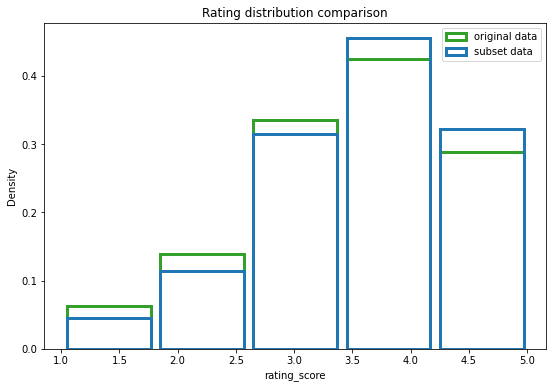

In [20]:
fig, ax = plt.subplots(figsize=(9,6))

sns.histplot(data=original_data, x='rating_score', bins=5, shrink=.9, lw=3,
             color='#33a02c', fill=False, stat='density', label='original data')

sns.histplot(data=ratings, x='rating_score', bins=5, shrink=.9, lw=3,
             color='#1f78b4', fill=False, stat='density', label='subset data')

plt.title("Rating distribution comparison")

plt.legend()
plt.show()

In [26]:
original_user_count = original_data.groupby('user_id').count()['movie_id']

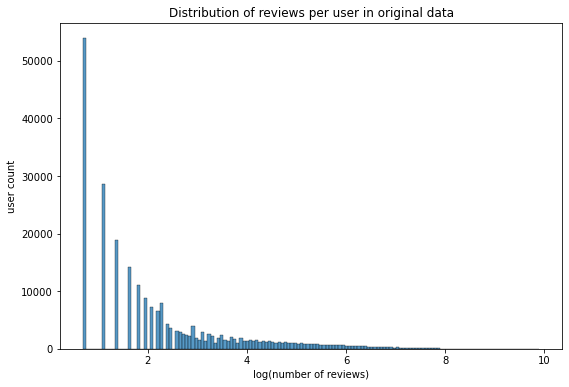

In [46]:
#filtered to exclude users with only 1 rating for scaling purposes

fig, ax = plt.subplots(figsize=(9,6))
sns.histplot(np.log(original_user_count[original_user_count>1]))
ax.set_title("Distribution of reviews per user in original data")
ax.set_ylabel("user count")
ax.set_xlabel("log(number of reviews)")
plt.show()

In [22]:
user_count = ratings.groupby('user_id').count()['movie_id']

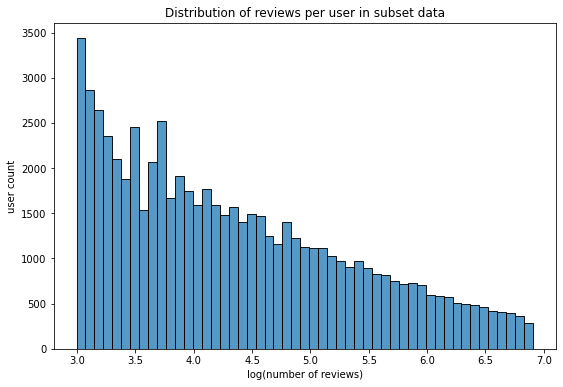

In [45]:
fig, ax = plt.subplots(figsize=(9,6))

sns.histplot(np.log(user_count))
ax.set_title("Distribution of reviews per user in subset data")
ax.set_ylabel("user count")
ax.set_xlabel("log(number of reviews)")
plt.show()

### Number of unique entries per column

Original data

In [49]:
for col in original_data.columns:
    print(col, len(original_data[col].unique()))

movie_id 142698
rating_score 6
user_id 451757


The 6th rating score is Nan, which is included in the original dataset for users who left text ratings but no numerical rating.

Subset data

In [50]:
for col in ratings.columns:
    print(col, len(ratings[col].unique()))

movie_id 89418
rating_score 5
user_id 64815
